### **4.10: Coding Etiquette & Excel Reporting**
* Consolidate results of Python analysis in a final report for stakeholders
* Prepare a population flow to demonstrate process of data cleaning

#### **- Loading necessary libraries**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### **- Loading cleaned merged Instacart Data**

In [2]:
# Creating shortcut for data file

path = r'/Users/anjanpakhrin/Documents/Instacart Basket Analysis/'

In [3]:
# Import merged instacart data set as dataframe "customers_merged"

customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_merged.pkl'))

In [4]:
# Output check

customers_merged.head()

,user_id,gender,state,age,date_joined,num_dependents,family_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_mean_prices,spending_flag,median_frequency,frequency_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


### **Part 1**
#### **Q2: PII check**

In [5]:
# Displaying columns name to investigate potential PII risk

column_list = customers_merged.columns.tolist()

In [6]:
column_list

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'num_dependents',
 'family_status',
 'income',
 'order_id',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'user_mean_prices',
 'spending_flag',
 'median_frequency',
 'frequency_flag']

The dataset contains demographic and behavioral information like **user_id, gender, state, and age**, but lacks direct high-risk identifiers such as email addresses, phone numbers, social security numbers, or physical addresses. The data is **appropriately anonymized for analytical purposes** with only aggregated customer attributes rather than directly identifiable personal information.

#### **Q3: Comparing customer behavior by geographic areas - region**

#### **Q3 - Step 1: Creating new column to assign states with census-bureau designated area**
* **Northeast:** Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
* **Midwest:** Illinois, Indiana, Iowa, Kansas, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, South Dakota, Wisconsin
* **South:** Alabama, Arkansas, Delaware, District of Columbia, Florida, Georgia, Kentucky, Louisiana, Maryland, Mississippi, North Carolina, Oklahoma, South Carolina, Tennessee, Texas, Virginia, West Virginia
* **West:** Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming
* **Source:** Wikipedia (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [7]:
# Returning values in column "state" for cross-check

states = customers_merged['state'].unique()
print(states)

['Missouri' 'New Mexico' 'Idaho' 'Iowa' 'Maryland' 'Kentucky' 'Montana'
 'South Carolina' 'Texas' 'Virginia' 'Nevada' 'Nebraska' 'Georgia'
 'Wyoming' 'Colorado' 'North Dakota' 'Wisconsin' 'Alaska' 'Vermont'
 'Arkansas' 'Maine' 'North Carolina' 'West Virginia' 'Indiana' 'Oregon'
 'Florida' 'California' 'Pennsylvania' 'Ohio' 'Connecticut' 'Arizona'
 'Louisiana' 'Washington' 'New York' 'Mississippi' 'Oklahoma' 'Utah'
 'New Hampshire' 'Hawaii' 'District of Columbia' 'Alabama' 'Massachusetts'
 'Rhode Island' 'Michigan' 'New Jersey' 'Kansas' 'South Dakota'
 'Minnesota' 'Illinois' 'Tennessee' 'Delaware']


In [8]:
# Confirming counts of states

states_count = customers_merged['state'].nunique()
print(f"The number os states in the data set: {states_count} including District of Columbia")

The number os states in the data set: 51 including District of Columbia


In [9]:
# Creating new column "region" based on regional segmenting in step 1 above

# lists of States based on Region
northeast = ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 
              'New York', 'Pennsylvania', 'Rhode Island', 'Vermont')
midwest = ('Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 
           'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin')
south = ('Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 
         'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 
         'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia')
west = ('Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 
        'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming')

# Assign region to the states in new colum "region"
customers_merged.loc[customers_merged['state'].isin(northeast), 'region'] = 'Northeast'
customers_merged.loc[customers_merged['state'].isin(midwest), 'region'] = 'Midwest'
customers_merged.loc[customers_merged['state'].isin(south), 'region'] = 'South'
customers_merged.loc[customers_merged['state'].isin(west), 'region'] = 'West'

In [10]:
# Checking output

customers_merged[['state', 'region']].drop_duplicates().sort_values('region').groupby('region').head(2)

,state,region
0,Missouri,Midwest
24470,Illinois,Midwest
6123,Connecticut,Northeast
2887,Maine,Northeast
9389,Mississippi,South
14894,Alabama,South
1508,Colorado,West
10612,Utah,West


In [11]:
# Count of customers by region

customers_merged.groupby(['region']).user_id.nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

In [12]:
# Checking number of customers per spending flag

customers_merged.groupby(['spending_flag']).user_id.nunique()

spending_flag
High spender      3388
Low spender     202821
Name: user_id, dtype: int64

#### **Q3 - Step 2: Determine spending habits of customers by U.S. regions** 

#### **Determine customer counts and average spending per customer category by region:**

In [13]:
# Creating average spending per category (High/Low spender) by region
region_spending_by_category = (
    customers_merged.groupby(['region', 'spending_flag'])
    .agg(
        customer_count=('user_id', 'nunique'),    # number of unique customers
        avg_spending=('user_mean_prices', 'mean') # average spending per category by region
    )
    .reset_index()
)

# Calculating percentage within each region
region_spending_by_category['percentage'] = (
    region_spending_by_category.groupby('region')['customer_count']
    .transform(lambda x: (x / x.sum() * 100).round(2))
)

# Reordering columns for better readability
region_spending_by_category = region_spending_by_category[[
    'region', 'spending_flag', 'avg_spending', 'customer_count', 
    'percentage', 
]]

# Renaming columns for clarity
region_spending_by_category = region_spending_by_category.rename(columns={
        'customer_count': 'number_of_customer',
        'percentage': 'rcustomer_percentage'
})

display(region_spending_by_category)

,region,spending_flag,avg_spending,number_of_customer,rcustomer_percentage
0,Midwest,High spender,10.561661,801,1.65
1,Midwest,Low spender,7.781946,47718,98.35
2,Northeast,High spender,10.582904,545,1.50
3,Northeast,Low spender,7.773312,35843,98.50
4,South,High spender,10.588804,1141,1.66
5,South,Low spender,7.784434,67596,98.34
6,West,High spender,10.578785,901,1.71
7,West,Low spender,7.779867,51664,98.29


<Figure size 1200x600 with 0 Axes>

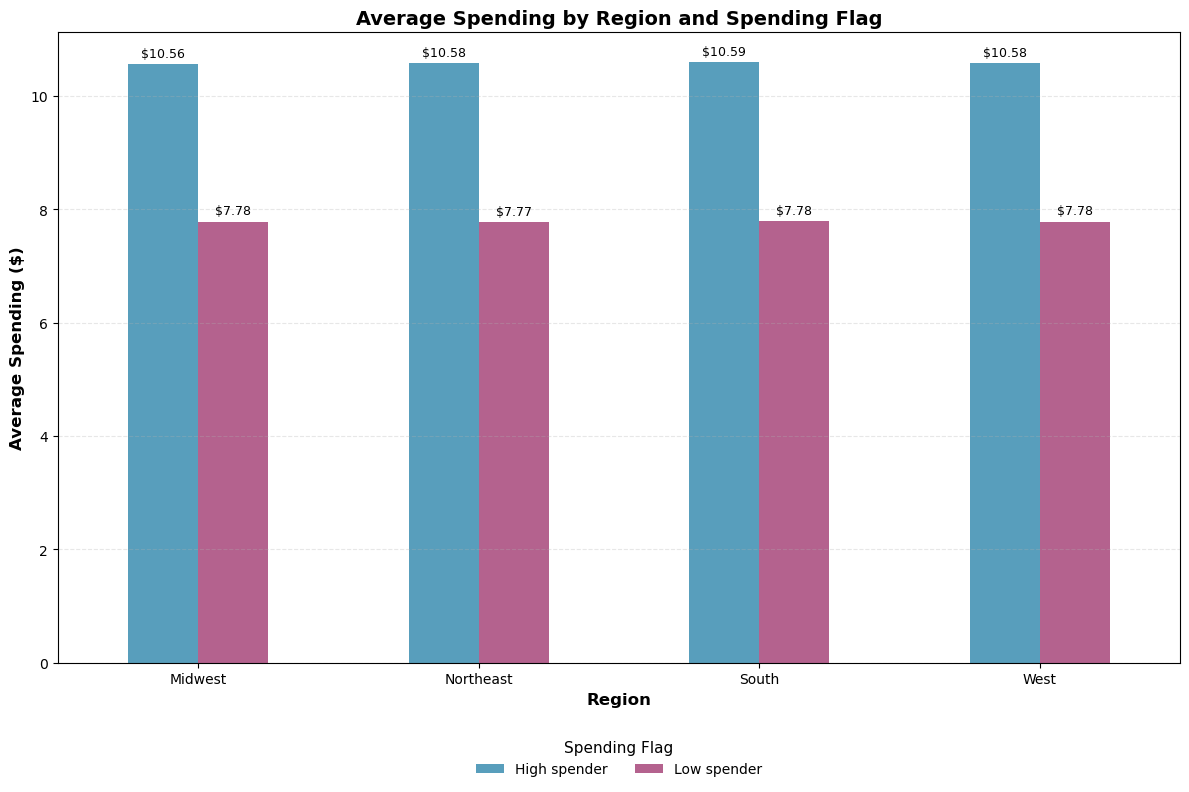

In [14]:
# Simple grouped bar chart
plt.figure(figsize=(12, 6))

# Pivot the data for easier plotting
pivot_data = region_spending_by_category.pivot(index='region', columns='spending_flag', values='avg_spending')

ax = pivot_data.plot(kind='bar', figsize=(12, 8), color=['#2E86AB', '#A23B72'], alpha=0.8)

plt.title('Average Spending by Region and Spending Flag', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Average Spending ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.legend(
    title='Spending Flag',
    title_fontsize=11,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=2,
    frameon=False
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='$%.2f', label_type='edge', fontsize=9, padding=3)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_regional_spending_flag.png'), bbox_inches='tight', dpi=300)
plt.show()

#### **Q4: Exclusion of low-activity customers**

In [15]:
# Creating exclusion flag for low-activity customers (less than 5 total orders)
customers_merged['exclusion_flag'] = customers_merged['max_order'] < 5

# Filter out low-activity customers
customers_active = customers_merged[~customers_merged['exclusion_flag']].copy()

# Export the filtered dataset
customers_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_active_customers.pkl'))

# Output check
print(f"Remaning customers: {customers_active['user_id'].nunique()}")
print(f"Excluded customers: {customers_merged['exclusion_flag'].sum()}")

Remaning customers: 162631
Excluded customers: 1440295


In [16]:
# Determining excluded rows
total_observations = customers_merged.shape[0]

# Row tied to excluded customers
excluded_observations = customers_merged.loc[customers_merged['exclusion_flag']].shape[0]

# Remaining rows after exclusion
remaining_observations = total_observations - excluded_observations

# Percentage excluded observations
excluded_observations_pct = (excluded_observations/total_observations)*100

# Output
print(f"Total observations: {total_observations:,}")
print(f"Excluded observations: {excluded_observations:,} ({excluded_observations_pct:.2f}%)")
print(f"Remaining observations: {remaining_observations:,}")

Total observations: 32,404,859
Excluded observations: 1,440,295 (4.44%)
Remaining observations: 30,964,564


#### **Q5: Create Profiling Variable**

#### **Recalling some basic informations, which are helpful for profiling customers**

In [17]:
# Income
customers_active['income'].agg(['min', 'mean', 'max', 'median']).round(2)

min        25903.00
mean       99675.87
max       593901.00
median     96765.00
Name: income, dtype: float64

In [18]:
# Age
customers_active['age'].agg(['min', 'mean', 'max', 'median']).round(2)

min       18.00
mean      49.47
max       81.00
median    49.00
Name: age, dtype: float64

#### **Defining profiles**

In [19]:
# Defining income groups based on data of "customers_active"
LOW_INCOME = 50000
MID_INCOME = 100000
HIGH_INCOME = 150000
PREMIUM_INCOME = 250000

# Define conditions
cond1 = (
    (customers_active['age'] <= 28) & 
    (customers_active['income'] <= LOW_INCOME) &
    (customers_active['num_dependents'] <= 1)
)

cond2 = (
    (customers_active['age'].between(30, 45)) &
    (customers_active['income'].between(LOW_INCOME+1, MID_INCOME)) & 
    (customers_active['num_dependents'] >= 1)
)
cond3 = (
    (customers_active['age'].between(30, 45)) & 
    (customers_active['income'].between(LOW_INCOME+1, MID_INCOME)) & 
    (customers_active['num_dependents'] <= 2) & \
    ((customers_active['order_hour_of_day'].between(9, 17)) | (customers_active['order_hour_of_day'] >= 20))
)
cond4 = (
    (customers_active['age'] >= 65) & 
    (customers_active['income'] <= MID_INCOME) & \
    (customers_active['order_day_of_week'] <= 4) & 
    (customers_active['order_hour_of_day'].between(9, 12))
)
# Apply np.select
customers_active['profile_flag'] = np.select(
    [cond1, cond2, cond3, cond4],
    ['Low-income/young parents',
     'Family oriented/Middle-income',
     'Wealthy professional',
     'Retired/Middle-income'],
    default='Mainstream shopper'
)

In [20]:
# Checking order distribution placed by different customer profiles

customers_active['profile_flag'].value_counts(dropna = False)

profile_flag
Mainstream shopper               25314125
Family oriented/Middle-income     3642057
Wealthy professional               977143
Retired/Middle-income              614153
Low-income/young parents           417086
Name: count, dtype: int64

#### Converting number of orders into percentage

In [21]:
# Determining order proportions in percetnage by profile
order_distribution_profile = customers_active['profile_flag'].value_counts(normalize=True)*100

# Returning percetnage of orders per profile
print(order_distribution_profile.round(2))

profile_flag
Mainstream shopper               81.75
Family oriented/Middle-income    11.76
Wealthy professional              3.16
Retired/Middle-income             1.98
Low-income/young parents          1.35
Name: proportion, dtype: float64


The analysis shows that the vast majority of orders are placed by **“Mainstream shopper” (≈82%)**, while more specific groups such as **Family oriented/Middle-income (≈12%)** and **Wealthy professionals (≈3%)** represent smaller but notable segments. **Retired/Middle-income (≈2%)** and **Budget-conscious young parents (≈1%)** are niche groups, indicating that targeted marketing for these profiles would reach only a small share of the customer base.

#### Determining numbers of unique customers in each profile

In [22]:
# Counting unique customers
number_of_customer = (customers_active.groupby('profile_flag')['user_id'].nunique().sort_values(ascending=False))

print(number_of_customer)

profile_flag
Mainstream shopper               140625
Family oriented/Middle-income     17982
Retired/Middle-income             12708
Wealthy professional               6039
Low-income/young parents           2957
Name: user_id, dtype: int64


#### **Q6: Visualizations of customer distribution by profile**

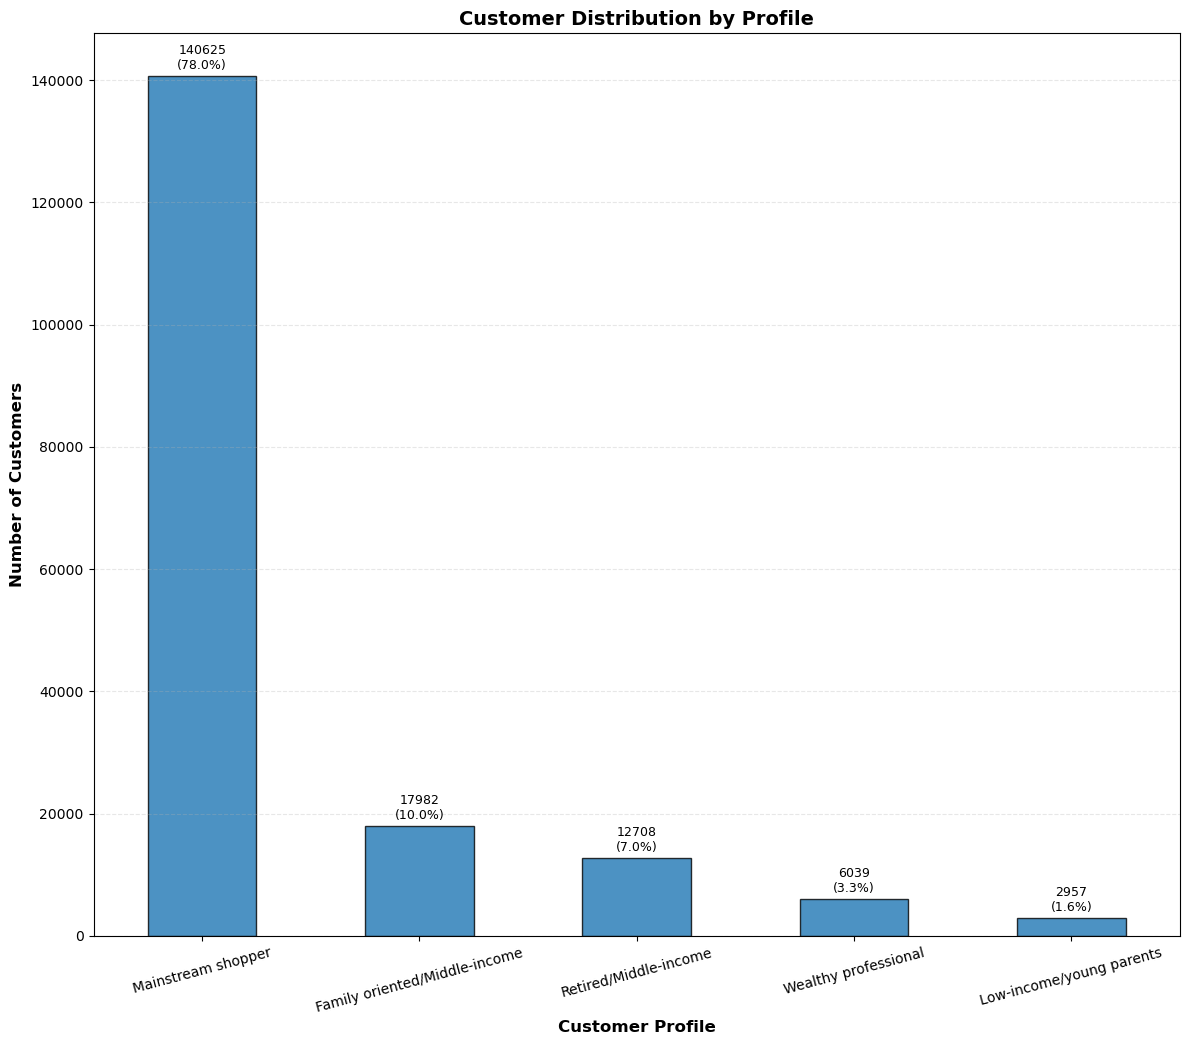

In [23]:
# Calculating percentage of customers for each profile group
total_customers = number_of_customer.sum()
customer_percentage = (number_of_customer/total_customers * 100).round(1)

# Creating bar chart
ax = number_of_customer.plot(
    kind = 'bar',
    figsize = (12, 12),
    edgecolor ='black',
    alpha = 0.8
)

# Setting labels
ax.set_xlabel('Customer Profile', fontsize = 12, fontweight='bold'),
ax.set_ylabel('Number of Customers', fontsize = 12, fontweight='bold'),
ax.set_title('Customer Distribution by Profile', fontsize=14, fontweight='bold')

# Adding value labels for each profile
for container in ax.containers:
    labels = [f'{count}\n({p}%)' for count, p in zip(number_of_customer, customer_percentage)]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.xticks(rotation=15, ha='center')

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile_flag.png'), bbox_inches='tight', dpi=300)

# Show bar chart
plt.show()

#### **Following conditions have been applied to create above porfile**
* **Family oriented/Middle-income:**
    * Age: 30 - 45
    * Income: `$`50,001 - `$`100,000
    * Dependets >= 1
* **Retired/Middle-income:**
    * Age: 65+
    * Income <= `$`100,000
    * Shopping time: Weekdays (Mon - Fri), Morning hours (9 AM - 12 AM)
* **Wealthy professional:**
    * Age: 30 - 45
    * Income: `$`50,001 - `$`100,000
    * Dependets <= 2
    * Shopping time: During business hour 9 AM - 5AM or Late evening (8 PM or later)
* **Budget-conscious young parents:**
    * Age < 28
    * Income <= `$`50,000
    * Dependents <= 1
* **Mainstream shopper:** All other customers

#### **Q7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure**

In [24]:
# Columns to aggregate
agg_columns = ['days_since_prior_order', 'median_frequency', 'prices', 'user_mean_prices']

# Aggregation dictionary
agg_dict = {col: ['min', 'mean', 'max'] for col in agg_columns}

# Group by profile_flag and aggregate
profile_agg = customers_active.groupby('profile_flag').agg(agg_dict)

profile_agg.round(2)

days_since_prior_order               \
                                                 min   mean   max   
profile_flag                                                        
Family oriented/Middle-income                    0.0  10.73  30.0   
Low-income/young parents                         0.0  11.18  30.0   
Mainstream shopper                               0.0  10.82  30.0   
Retired/Middle-income                            0.0  10.85  30.0   
Wealthy professional                             0.0  10.77  30.0   

                              median_frequency              prices        \
                                           min   mean   max    min  mean   
profile_flag                                                               
Family oriented/Middle-income              0.0   9.85  30.0    1.0  7.93   
Low-income/young parents                   0.0  10.56  30.0    1.0  6.90   
Mainstream shopper                         0.0   9.97  30.0    1.0  7.79   
Retired/Middle-income                      0.0   9.87  30.0    1.0  7.35   
Wealthy professional                       0.0   9.88  30.0    1.0  7.93   

                                    user_mean_prices                   
                                max              min  mean        max  
profile_flag                                                           
Family oriented/Middle-income  25.0             2.05  7.93  18.230000  
Low-income/young parents       25.0             2.10  6.90  13.880000  
Mainstream shopper             25.0             1.00  7.79  20.110001  
Retired/Middle-income          25.0             1.26  7.36  13.450000  
Wealthy professional           25.0             3.21  7.93  13.400000

#### **Q8: Compare customer profile with regions and departments.**

#### **Customer distribution by profile vs. Regions - Summary**

In [25]:
# Number of customers by profile per region
profile_region = (
    customers_active
    .groupby(['region', 'profile_flag'])['user_id']
    .nunique()
    .reset_index(name='unique_customers')
)

# Pivot for easier visualization
profile_region_pivot = profile_region.pivot(index='region', columns='profile_flag', values='unique_customers').fillna(0)
profile_region_pivot

profile_flag,Family oriented/Middle-income,Low-income/young parents,Mainstream shopper,Retired/Middle-income,Wealthy professional
region,,,,,
Midwest,4151,655,33310,2977,1452
Northeast,3237,538,24617,2204,1063
South,6077,1000,46767,4270,1991
West,4517,764,35931,3257,1533


#### **Customer distribution by profile vs. Regions - Visualization**

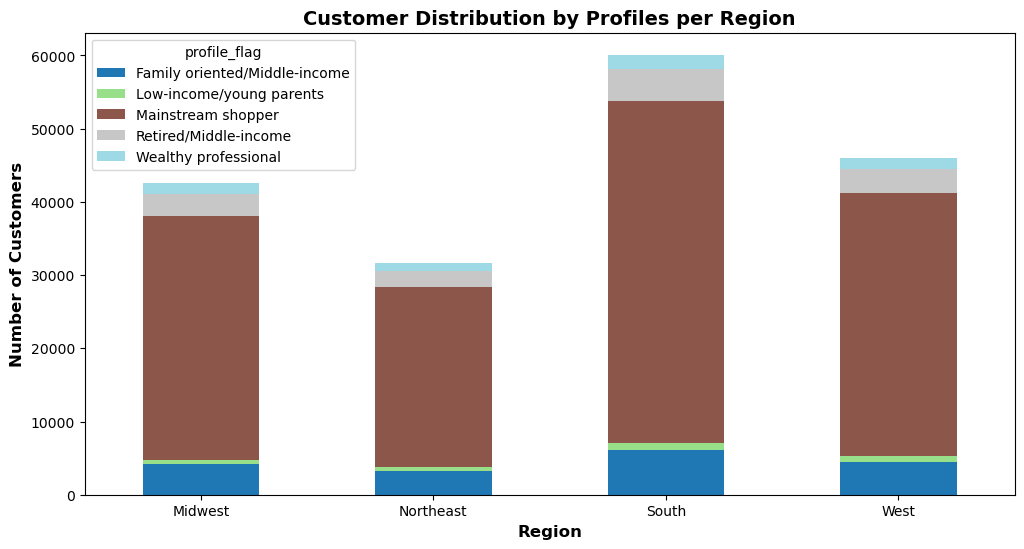

In [26]:
# Ckreate chart
profile_region_pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

# Label title and axes
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.title('Customer Distribution by Profiles per Region', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_profile_flag.png'), bbox_inches='tight', dpi=300)

# Display chart
plt.show()

#### **Order distribution by profile vs. Regions**

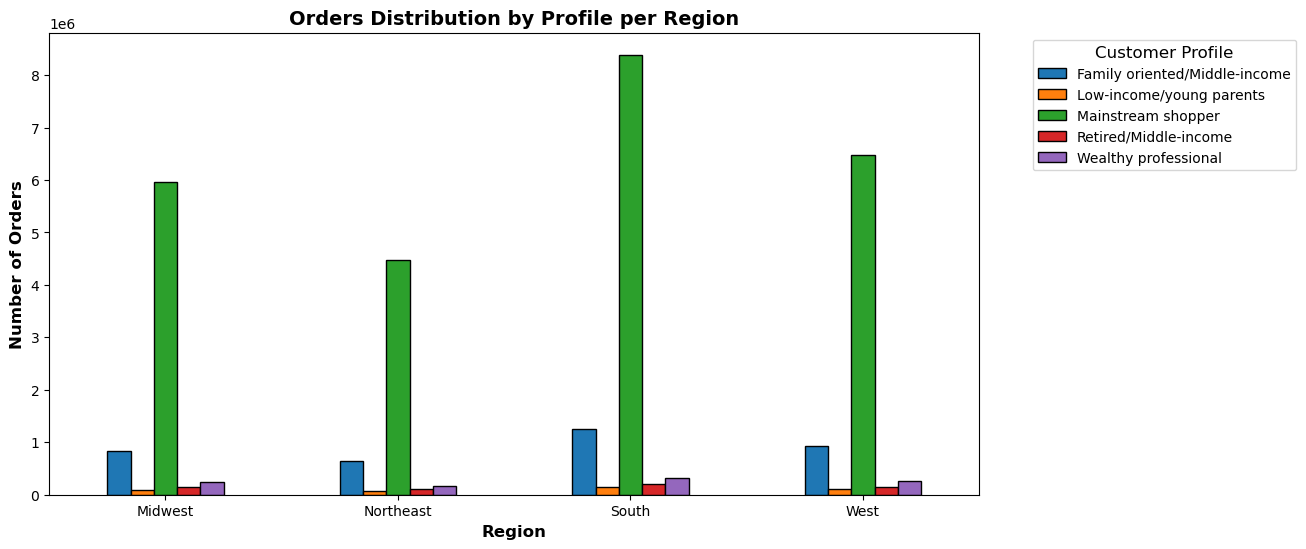

In [27]:
# Cross-tab for profile vs region
cross_region = pd.crosstab(customers_active['region'], customers_active['profile_flag'])

# Plotting grouped bar chart
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
ax = cross_region.plot(kind='bar', figsize=(12, 6), edgecolor='black')

# Labeling title and axies
plt.title('Orders Distribution by Profile per Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Legend formatting
plt.legend(title='Customer Profile', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05,1), loc='upper left')

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_by_profile.png'), bbox_inches='tight', dpi=300)

# Display chart
plt.show()

#### **Customer profile vs. Department - Summary**

In [28]:
# Creating a mapping dictionary
dept_map = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Mapping department_id --> department_name
customers_active['department_name'] = customers_active['department_id'].map(dept_map)

# Grouping by department_name and proflie_flag
profile_dept = (
    customers_active
    .groupby(['department_name', 'profile_flag'], as_index=False)['user_id']
    .nunique()
    .rename(columns={'user_id': 'unique_customers'})
)

# Pivot for easier visualization
profile_dept_pivot = (
    profile_dept
    .pivot(index='department_name', columns='profile_flag', values='unique_customers')
    .fillna(0)
)

# Display output
profile_dept_pivot

profile_flag,Family oriented/Middle-income,Low-income/young parents,Mainstream shopper,Retired/Middle-income,Wealthy professional
department_name,,,,,
alcohol,1341,205,11285,551,420
babies,3603,357,25508,1124,1088
bakery,13581,1765,100720,5690,4401
beverages,15948,2528,121839,8674,5180
breakfast,11215,1556,83209,4487,3516
bulk,1429,166,9596,396,383
canned goods,13260,1497,95939,4864,4220
dairy eggs,17282,2577,131905,10001,5775
deli,13038,1702,96585,5249,4205


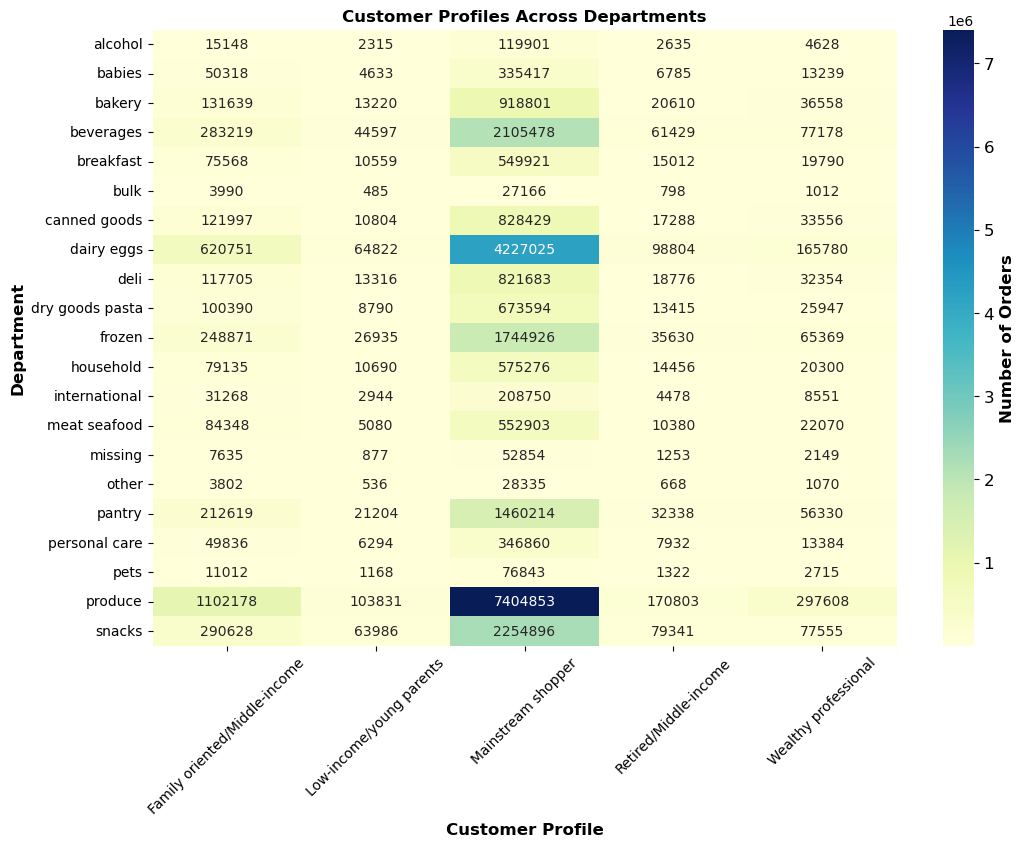

In [29]:
# Creating pivot table to plot
profile_dept_pivot = customers_active.pivot_table(
    index='department_name',
    columns='profile_flag',
    values='order_id',
    aggfunc='count'
).fillna(0)

# Plotting heatmap for department vs. profile for orders
plt.figure(figsize=(12,8))

ax = sns.heatmap(
    profile_dept_pivot, 
    annot=True, fmt=".0f", 
    cmap="YlGnBu", cbar_kws={'label': 'Number of Orders'}
)

# Adjust colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Number of Orders', fontsize=12, fontweight='bold')

# Adding labels
plt.title('Customer Profiles Across Departments', fontsize=12, fontweight='bold')
plt.ylabel('Department', fontsize=12, fontweight='bold')
plt.xlabel('Customer Profile', fontsize=12, fontweight='bold')

# Rotating labels for customer profile
plt.xticks(rotation=45, ha='center')


# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_profile_dept.png'), bbox_inches='tight', dpi=300)

# Display heatmap
plt.show()

#### **Determining most popular departments**

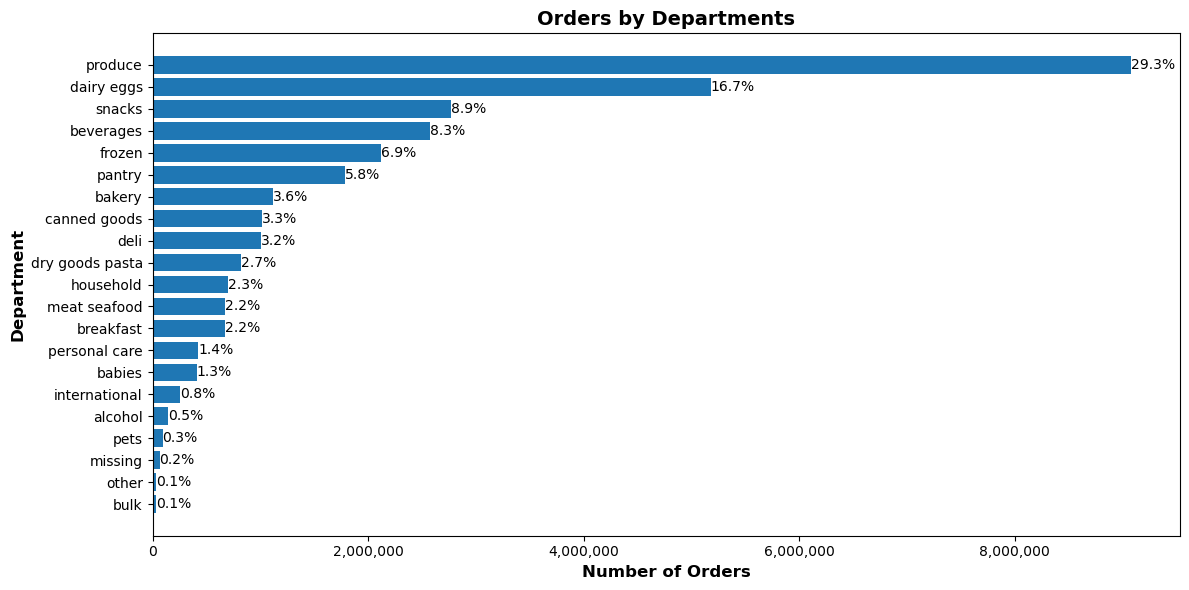

In [30]:
# Counting departments
dept_counts = customers_active["department_name"].value_counts().sort_values(ascending=True)

# Calculating percentage
total_orders = dept_counts.sum()
dept_pct = (dept_counts/total_orders*100).round(1)

# Plotting chart
ax=plt.figure(figsize=(12,6))
bars = plt.barh(dept_counts.index, dept_counts.values)

# Labeling bar with values
for i, (dept, count) in enumerate(dept_counts.items()):
    percentage = dept_pct[dept]
    plt.text(count + 500, 
             i,
             f"{percentage}%", va='center', fontsize=10)

# Labeling title and axes
plt.title("Orders by Departments", fontsize=14, fontweight='bold')
plt.xlabel("Number of Orders", fontsize=12, fontweight='bold')
plt.ylabel("Department", fontsize=12, fontweight='bold')

# Format x-axis to show whole numbers
ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_popular_dept.png'), bbox_inches='tight', dpi=300)

# Display chart
plt.show()

#### **Heatmap: Order distribution by Order_DOW and customer profile**

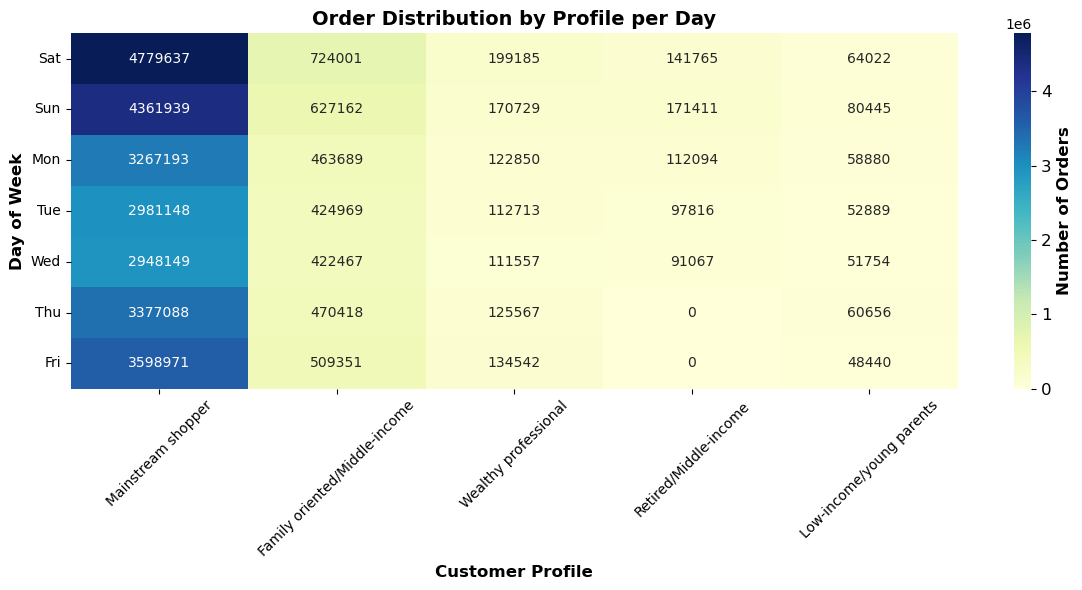

In [31]:
# Creating pivot with order_day_of_week
profile_dow_pivot = customers_active.pivot_table(
    index='order_day_of_week',
    columns='profile_flag',
    values='order_id',
    aggfunc='count'
).fillna(0)

# Maping DOW (Day of Week)
dow_map = {0: 'Sat', 1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri'}
order_day_of_week = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

profile_dow_pivot.index = profile_dow_pivot.index.map(dow_map)
profile_dow_pivot = profile_dow_pivot.reindex(order_day_of_week)

# Sorting values
profile_dow_pivot = profile_dow_pivot.loc[:, profile_dow_pivot.sum().sort_values(ascending=False).index]

# Plotting heatmap for day of week vs. profile for orders
plt.figure(figsize=(12,6))

# With colorbar
ax = sns.heatmap(
    profile_dow_pivot, 
    annot=True, 
    fmt=".0f", 
    cmap="YlGnBu", 
    cbar_kws={'label': 'Number of Orders'}
)

# Adjusting colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Number of Orders', fontsize=12, fontweight='bold')

# Adding titles and labels
plt.title('Order Distribution by Profile per Day', fontsize=14, fontweight='bold')
plt.ylabel('Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Customer Profile', fontsize=12, fontweight='bold')

# Rotate labels for customer profile
plt.xticks(rotation=45, ha='center')

# Displaying labels of days of week horizontal
plt.yticks(rotation=0)

# Adjustin layout
plt.tight_layout()

# Saving the bar chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_order_by_dow.png'), bbox_inches='tight', dpi=300)

# Display heatmap
plt.show()

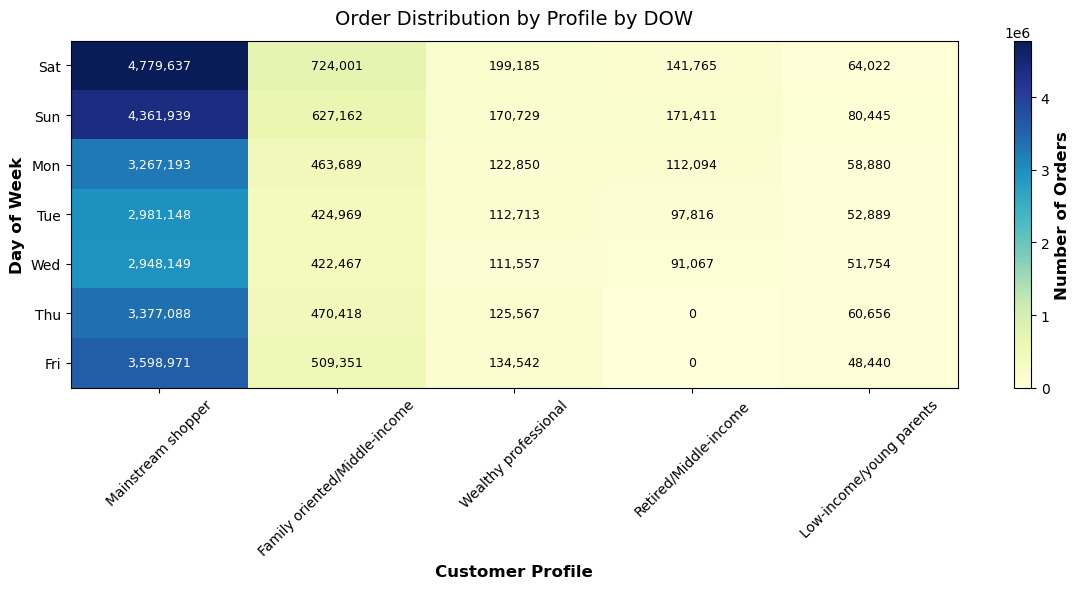

In [32]:
# Creating cross-tabulation
dow_profile_ct = pd.crosstab(customers_active['order_day_of_week'], customers_active['profile_flag'])

# Sorting profiles by total orders (descending)
profile_order = dow_profile_ct.sum(axis=0).sort_values(ascending=False).index.tolist()
dow_profile_ct = dow_profile_ct[profile_order]

# Mapping day numbers to day names
dow_map = {0: 'Sat', 1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri'}
y_ticks = list(dow_profile_ct.index)
y_ticklabels = [dow_map.get(int(v), str(v)) for v in y_ticks]

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(dow_profile_ct.values, aspect='auto', cmap='YlGnBu')

# Setting titles and labels
ax.set_title('Order Distribution by Profile by DOW', fontsize=14, pad=12)
ax.set_xlabel('Customer Profile', fontsize=12, fontweight='bold')
ax.set_ylabel('Day of Week', fontsize=12, fontweight='bold')

# Setting x-ticks (customer profiles)
ax.set_xticks(np.arange(dow_profile_ct.shape[1]))
ax.set_xticklabels(dow_profile_ct.columns, rotation=45, ha='center')

# Setting y-ticks (days of week)
ax.set_yticks(np.arange(dow_profile_ct.shape[0]))
ax.set_yticklabels(y_ticklabels)

# Adding value annotations with automatic color contrast
vals = dow_profile_ct.values
threshold = vals.max() / 2

for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        color = 'white' if vals[i, j] > threshold else "black"
        ax.text(j, i, f"{int(vals[i, j]):,}", ha='center', va='center', color=color, fontsize=9)

# Adding colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Number of Orders', rotation=90, fontsize=12, fontweight='bold')

plt.tight_layout()

# Saving the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_order_by_dow_2.png'), 
            bbox_inches='tight', dpi=300)

plt.show()

#### **Q8: Compare your customer profiles with regions and departments**

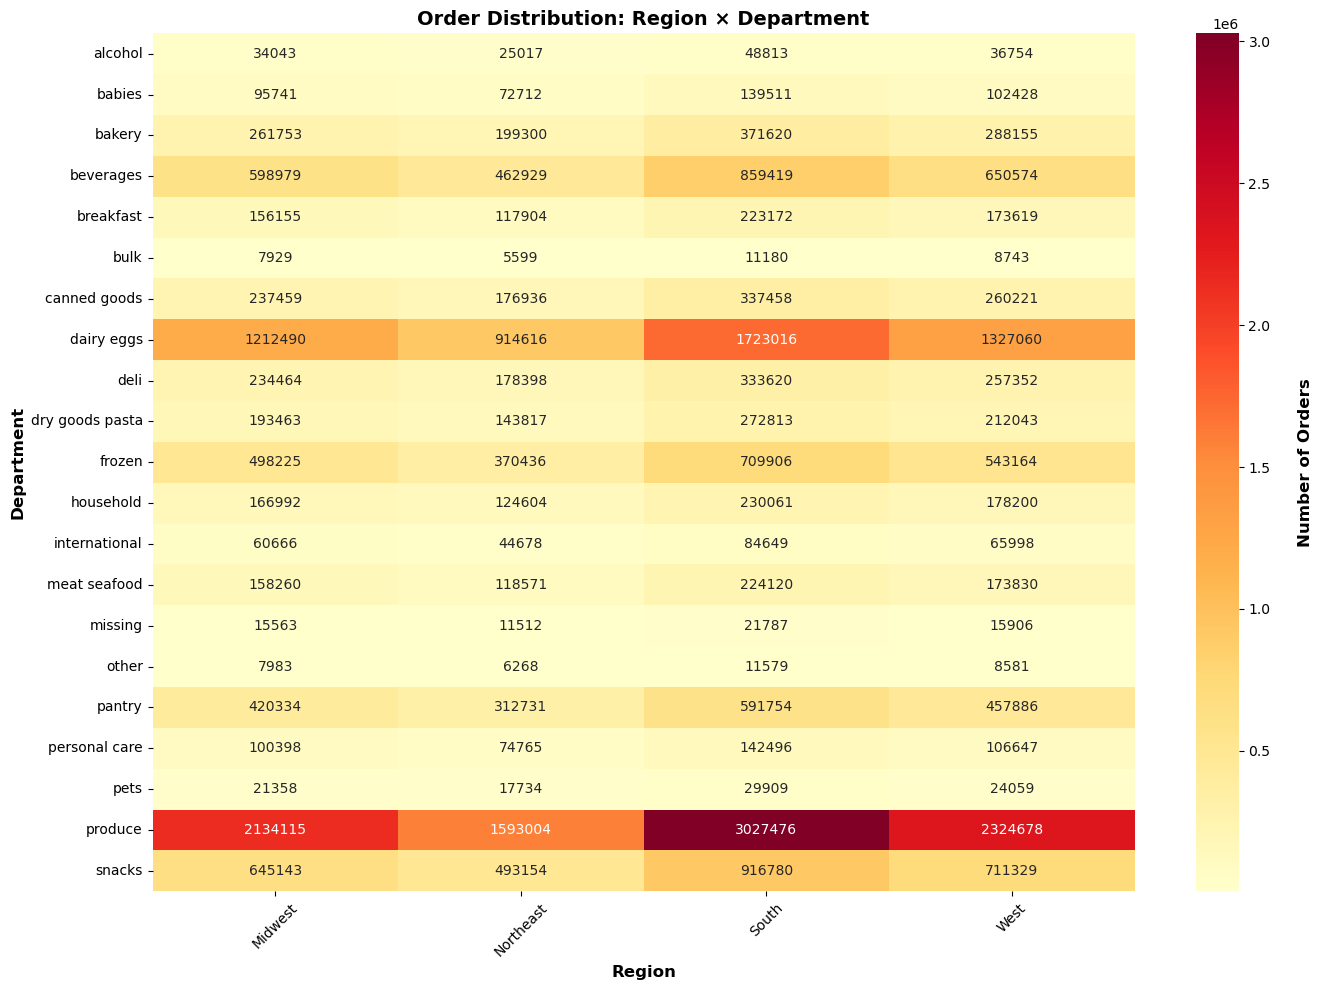

In [33]:
# Create a pivot table
region_dept_pivot = customers_active.pivot_table(
    index='department_name',
    columns='region', 
    values='order_id',
    aggfunc='count'
)

fig, ax = plt.subplots(figsize=(14, 10))
heatmap = sns.heatmap(region_dept_pivot, annot=True, fmt=".0f", cmap="YlOrRd", ax=ax)

# Add colorbar with custom label
cbar = heatmap.collections[0].colorbar
cbar.set_label('Number of Orders', rotation=90, labelpad=20, fontsize=12, fontweight='bold')

plt.title('Order Distribution: Region × Department', fontsize=14, fontweight='bold')
plt.ylabel('Department', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()


# Saving the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_dept_region.png'), bbox_inches='tight', dpi=300)

plt.show()

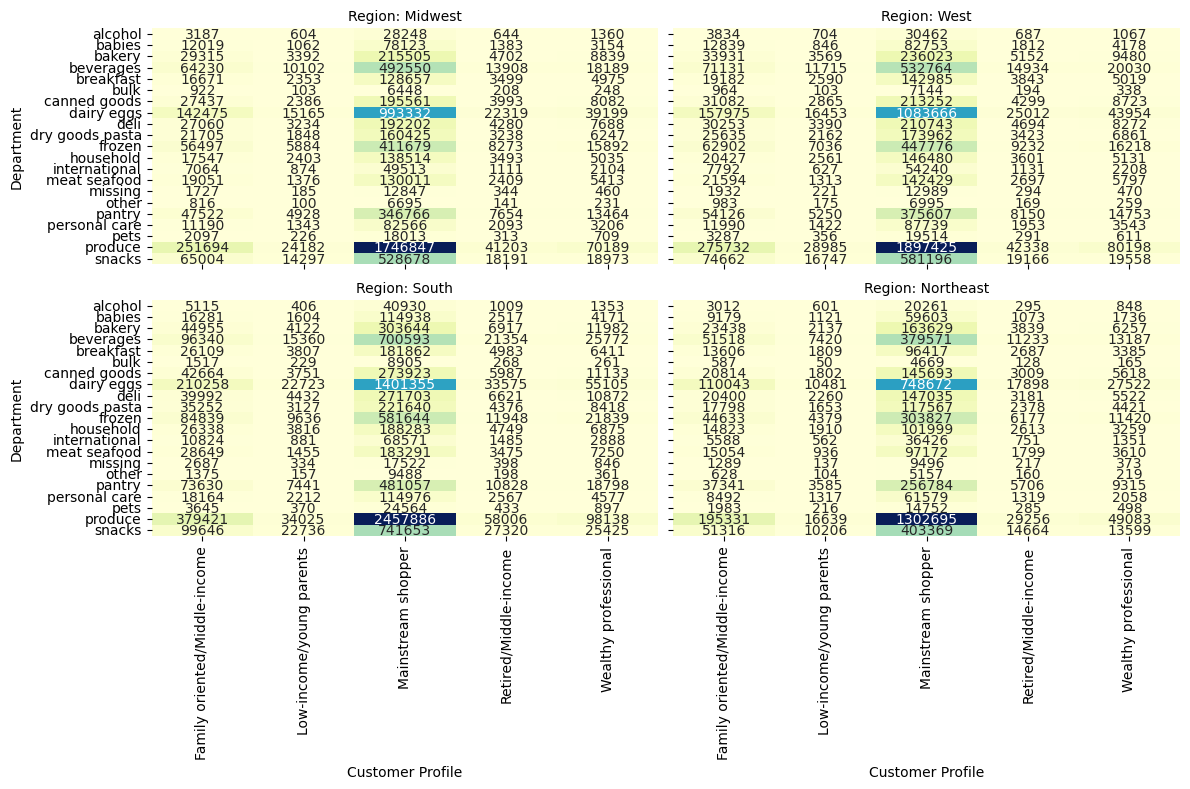

In [34]:
# Create a grid of heatmaps for each region
g = sns.FacetGrid(data=customers_active, col='region', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(lambda data, color: sns.heatmap(
    pd.crosstab(data['department_name'], data['profile_flag'], 
                values=data['order_id'], aggfunc='count'),
    annot=True, fmt='.0f', cmap='YlGnBu', cbar=False
))
g.set_titles('Region: {col_name}')
g.set_axis_labels('Customer Profile', 'Department')
plt.tight_layout()

# Saving the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_dept_region_profile.png'), bbox_inches='tight', dpi=300)
plt.show()

* The data suggests that regions with higher overall order volumes, particularly in "Produce" and "Dairy Eggs" likely have a greater proportion of "Mainstream shopper" and "Family oriented/Middle-income" customer profiles, who show a strong preference for these departments. Regional variations in department popularity align with the purchasing behaviors of specific customer profiles.
* The "Mainstream shopper" and "Family oriented/Middle-income" profiles showed the highest order numbers in "Produce" and "Dairy Eggs" across all customer profiles.

#### **Q9: Export**

In [35]:
# Export fineal dataframe "Prepared Data" as pickle

customers_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_active_customers.pkl'))